Summarize results from the gene editing scenarion in which the top 1% of bulls and no (0%) cows were edited for the horned locus.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.mpl_style', 'default')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

/home/jcole/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
plt.rcdefaults()
# Typeface sizes
from matplotlib import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 12
#rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Computer Modern Roman']
#rcParams['text.usetex'] = True

# Optimal figure size
WIDTH = 350.0  # the number latex spits out
FACTOR = 0.90  # the fraction of the width you'd like the figure to occupy
fig_width_pt  = WIDTH * FACTOR

inches_per_pt = 1.0 / 72.27
golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good

fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches
fig_height_in = fig_width_in * golden_ratio   # figure height in inches
fig_dims      = [fig_width_in, fig_height_in] # fig dims as a list

rcParams['figure.figsize'] = fig_dims

In [4]:
#methods = ['crispr', 'noedits', 'perfect', 'talen', 'zfn']
methods = ['noedits', 'zfn', 'talen', 'crispr', 'perfect']
for method in methods:
    # We have 10 relicates for each simulation
    for sim in xrange(1,11):
        # Load the individual allele frequency history files
        af = pd.read_csv('horned/10_01/%s/%s/minor_allele_frequencies_%s.txt'%(method,sim,method), sep='\t')
        af.columns = ['generation', 'frequency']
        af['replicate'] = sim
        af['method'] = method
        if sim == 1 and method == methods[0]:
            all_replicates = af
        else:
            all_replicates = pd.concat([all_replicates, af])

In [5]:
grouped = all_replicates.groupby(['generation', 'method']).mean().reset_index()
#grouped = all_replicates.groupby(['generation', 'method']).mean()
grouped.head()

,generation,method,frequency,replicate
0,1,crispr,0.978555,5.5
1,1,noedits,0.979826,5.5
2,1,perfect,0.972982,5.5
3,1,talen,0.987999,5.5
4,1,zfn,0.982414,5.5


In [6]:
expected = {}
actual = {}

for r in ['Horned']:
    expected[r] = {}
    actual[r] = {}
    for method in methods:
        expected[r][method] = []
        actual[r][method] = []
        for g in xrange(1,21):
            if g == 1:
                expected[r][method].append(float(grouped[(grouped['generation']==g) & (grouped['method']==method)]['frequency']))
            else:
                q0 = expected[r][method][g-2]
                p0 = 1. - q0
                q1 = (p0*q0) + q0**2
                expected[r][method].append(q1)
            actual[r][method].append(float(grouped[(grouped['generation']==g) & (grouped['method']==method)]['frequency']))
        
#for k in expected[r].keys():
#print k, ':\t', expected[r][k], '\n'
    
print expected['Horned']['crispr']

[0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001, 0.9785552299063001]


/home/jcole/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/jcole/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


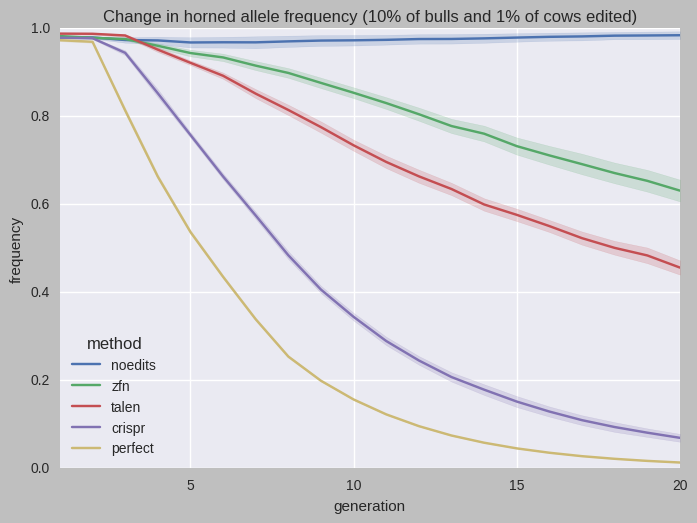

In [7]:
import seaborn as sns
sns.set(style="darkgrid")
#sns.set_style("white")
#sns.tsplot(data=grouped, time="generation", unit="replicate", condition="method", value="frequency")
sns_plot = sns.tsplot(data=all_replicates, time="generation", unit="replicate", condition="method", value="frequency")
sns.plt.title('Change in horned allele frequency (10% of bulls and 1% of cows edited)')
plt.show()
sns_plot.get_figure().savefig('horned/10_01/rate_of_allele_frequency_change_horned__10_01.png', dpi=300)

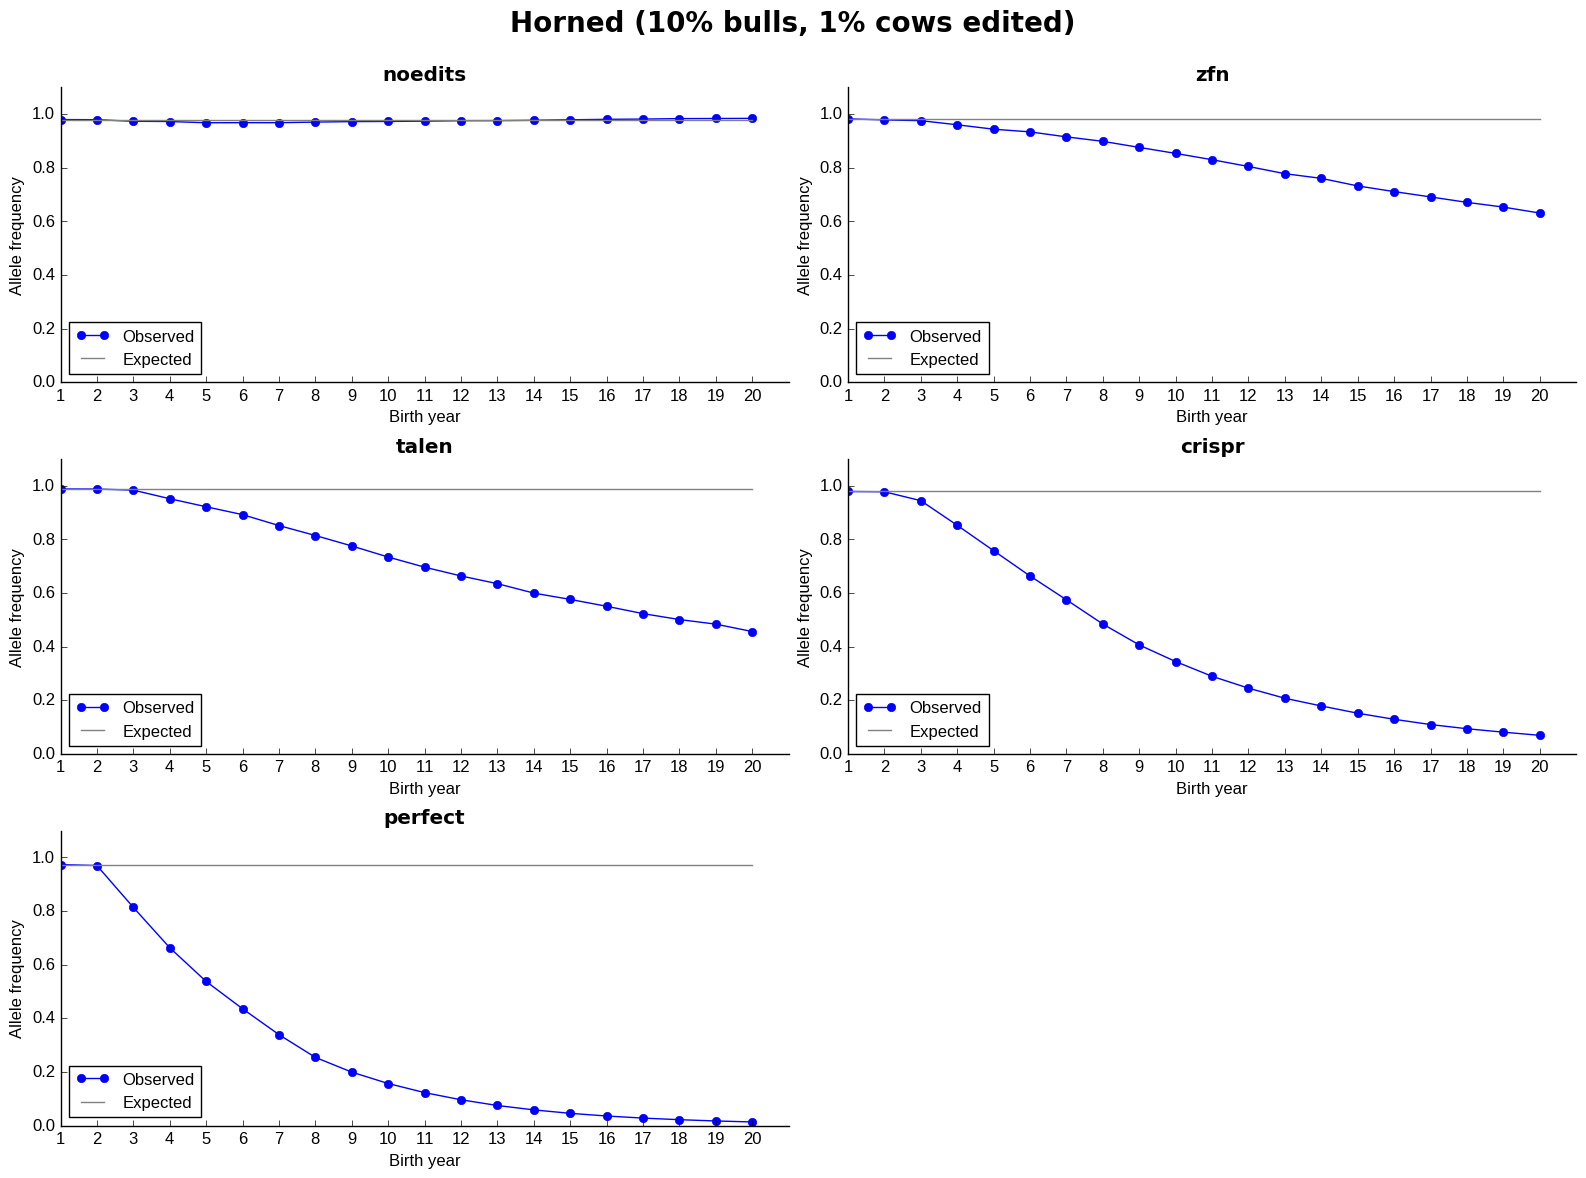

In [208]:
fig = plt.figure(figsize=(16, 12), dpi=300, facecolor='white')

xlabels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
colors = itertools.cycle(['r', 'g', 'b'])

for r in ['Horned']:
    for i, m in enumerate(methods):
        ax = fig.add_subplot(3, 2, i+1)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_title(m, weight='bold')
        ax.set_xlabel('Birth year')
        ax.set_ylabel('Allele frequency')
        ax.plot(actual[r][m], label='Observed', marker='o', c='b', mec='b')
        ax.plot(expected[r][m], label='Expected', c='gray')
        if r == 'Horned':
            ax.set_ylim(0.0, 1.1)
        else:
            ax.set_ylim(0.0, 0.09)
        # Manually set the number of ticks on the plot
        ax.set_xticks(np.arange(20))
        # Apply the tick labels
        ax.set_xticklabels(xlabels)
        # Turn off the top and right tick marks
        plt.tick_params(
            axis='both',       # changes apply to both axes
            which='both',      # both major and minor ticks are affected
            right='off',
            labelright='off',
            top='off',         # ticks along the top edge are off
            labeltop='off')    # labels along the bottom edge are off
        # Place the legend
        ax.legend(loc='best')
        
# Use the recessive name as the title for each set of subplots
plt.suptitle('%s (10%% bulls, 1%% cows edited)'%r, fontsize=20, weight='bold')
plt.tight_layout(pad=1., w_pad=0.5, h_pad=0.95)
# Tweak the layout so that the subplot titles don't overlap because tight_layout()
# ignores suptitle().
plt.subplots_adjust(top=0.915)
plt.show()
#fig.savefig('/Users/jcole/Documents/AIPL/Genomics/Recessives/holstein-act-vs-exp-rec.png', dpi=300)
fig.savefig('holstein-act-vs-exp-horned-by-method_10_01.png', dpi=300)

Now we're going to regress frequency on birth year to estimate trend.

In [210]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
def fit_line(x, y):
    """Return RegressionResults instance of best-fit line."""
    #X = sm.add_constant(x)
    data = {'x':np.array(x), 'y':np.array(y)}
    fit = smf.ols(formula = 'y ~ x + I(x**2)', data=data).fit()
    print fit.summary()
    
    prstd, iv_l, iv_u = wls_prediction_std(fit)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(x, y, 'o', label="data")
    ax.plot(x, fit.fittedvalues, 'r', label="OLS")
    ax.plot(x, iv_u, 'r--')
    ax.plot(x, iv_l, 'r--')
    ax.legend(loc='best');
    ax.set_ylim(0.0, 1.1)
    ax.set_xlim(0., 20.)
    plt.show()
    
    return fit



==>  noedits
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     34.47
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           1.04e-06
Time:                        15:36:56   Log-Likelihood:                 93.019
No. Observations:                  20   AIC:                            -180.0
Df Residuals:                      17   BIC:                            -177.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9784      0.002    5

/home/jcole/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


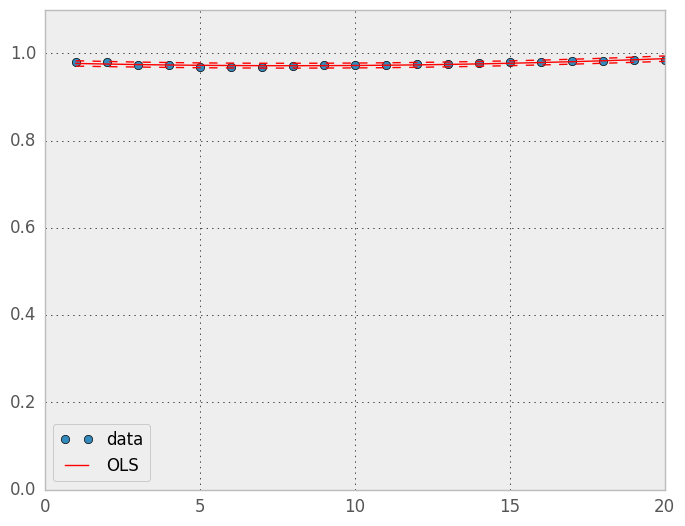



==>  zfn
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1724.
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           2.35e-20
Time:                        15:36:56   Log-Likelihood:                 67.886
No. Observations:                  20   AIC:                            -129.8
Df Residuals:                      17   BIC:                            -126.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0108      0.007    154.2

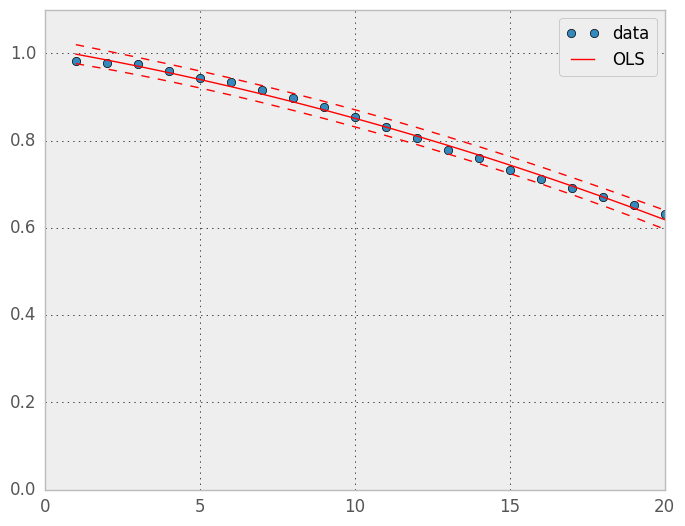



==>  talen
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     946.0
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           3.73e-18
Time:                        15:36:57   Log-Likelihood:                 53.072
No. Observations:                  20   AIC:                            -100.1
Df Residuals:                      17   BIC:                            -97.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0661      0.014     77

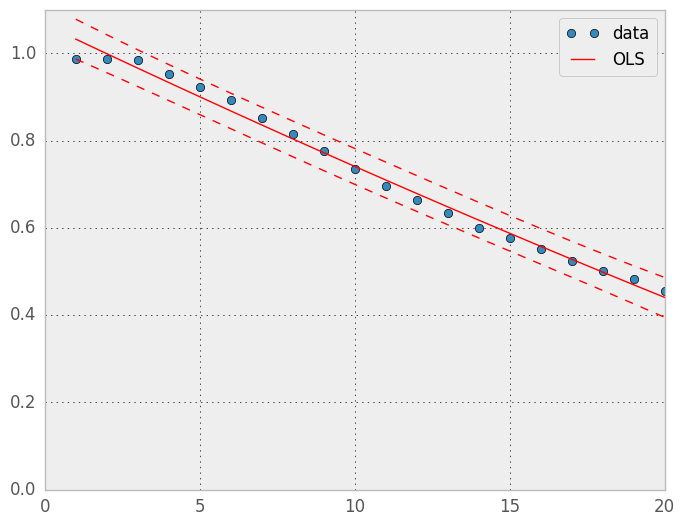



==>  crispr
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     754.8
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           2.50e-17
Time:                        15:36:57   Log-Likelihood:                 39.428
No. Observations:                  20   AIC:                            -72.86
Df Residuals:                      17   BIC:                            -69.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1846      0.027     4

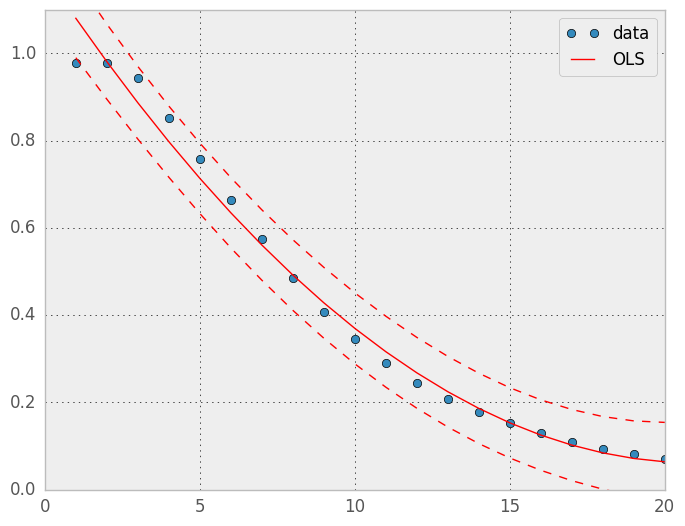



==>  perfect
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     708.6
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           4.24e-17
Time:                        15:36:57   Log-Likelihood:                 38.823
No. Observations:                  20   AIC:                            -71.65
Df Residuals:                      17   BIC:                            -68.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1557      0.028     

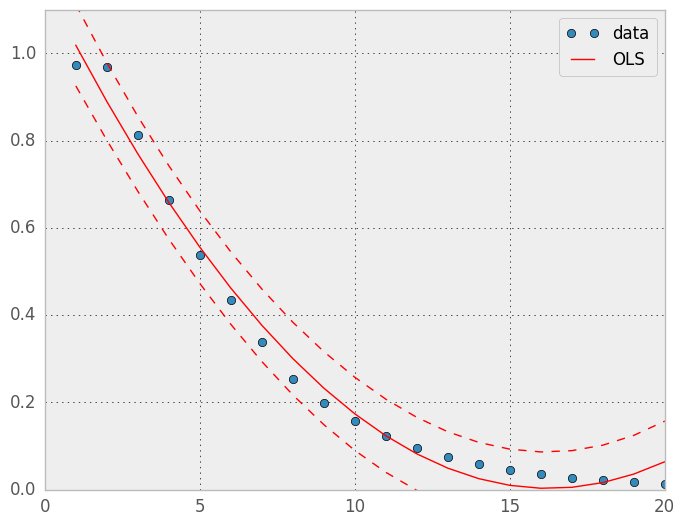

In [211]:
fits = {}
years = [float(i) for i in xrange(1,21)]
for r in ['Horned']:
    fits[r] = {}
    for m in methods:
        print '\n\n==> ', m
        fit = fit_line(y=actual[r][m], x=years)
        fits[r][m] = fit

Now we have to load the animal records so that we can compute the cumulative genetic gain for each gene editing method.

In [13]:
#import dask.dataframe as dd
for method in methods:
    print method
    # We have 10 replicates for each simulation
    for sim in xrange(1,11):
        if sim == 1: print '\tReplicate: ', sim,
        elif sim < 10: print ', ', sim,
        else: print ', ', sim, ''
        # Load the individual history files
        #print '\t\tReading live cows.'
        lc = pd.read_csv('horned/10_01/%s/%s/cows_history_%s_20.txt'%(method,sim,method), sep='\t')
        #print '\t\tReading dead cows.'
        dc = pd.read_csv('horned/10_01/%s/%s/dead_cows_history_%s_20.txt'%(method,sim,method), sep='\t')
        #print '\t\tReading live bulls.'
        lb = pd.read_csv('horned/10_01/%s/%s/bulls_history_%s_20.txt'%(method,sim,method), sep='\t')
        #print '\t\tReading dead bulls.'
        db = pd.read_csv('horned/10_01/%s/%s/dead_bulls_history_%s_20.txt'%(method,sim,method), sep='\t')
        # Stack the individual animal datasets
        #print '\t\tConcatenating animal datasets'
        all_animals = pd.concat([lc, dc, lb, db], axis=0)
        all_animals['replicate'] = sim
        all_animals['method'] = method
        if method == methods[0] and sim == 1:
            #print '\t\tCreating initial dataframe for replicates.'
            #all_replicates = all_animals
            grouped = all_animals.groupby(['born', 'method']).mean().reset_index()
        else:
            #print '\t\tCreating successive dataframe for replicates.'
            grouped = pd.concat([grouped, all_animals.groupby(['born', 'method']).mean().reset_index()])

 noedits
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
zfn
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
talen
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
crispr
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
perfect
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 


In [14]:
grouped.head()

,born,method,animal,sire,dam,herd,died,TBV,inbreeding,replicate
0,-9,noedits,35176.022222,0.0,0.0,113.600000,1.066667,315.013749,0.0,1.0
1,-8,noedits,35205.342105,0.0,0.0,87.289474,1.052632,290.579668,0.0,1.0
2,-7,noedits,35179.826087,0.0,0.0,87.304348,1.130435,305.523978,0.0,1.0
3,-6,noedits,35183.906250,0.0,0.0,107.093750,1.000000,239.163466,0.0,1.0
4,-5,noedits,35156.513514,0.0,0.0,80.891892,1.000000,235.122805,0.0,1.0


In [15]:
all_replicates['method'].value_counts()

zfn        200
talen      200
crispr     200
perfect    200
noedits    200
Name: method, dtype: int64

In [16]:
#grouped = all_replicates.groupby(['generation', 'method']).mean().reset_index()
#grouped.head()

In [17]:
grouped.sort_values(by=['method','born'], inplace=True)

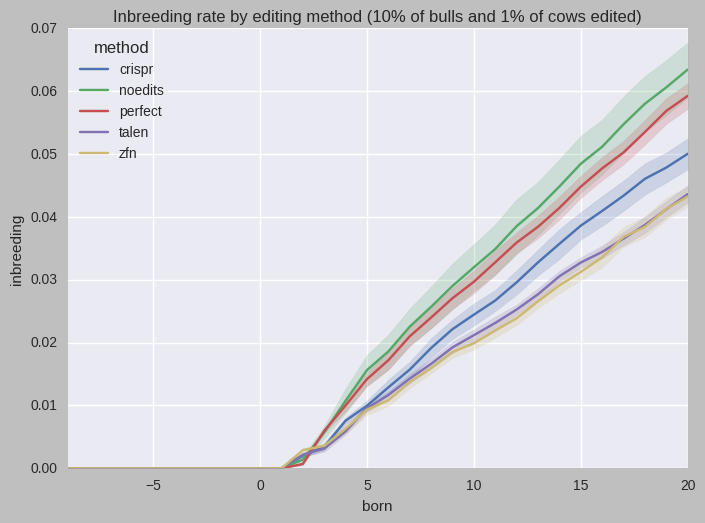

In [18]:
# Plot inbreeding by method
import seaborn as sns
sns.set(style="darkgrid")
sns_plot = sns.tsplot(data=grouped, time="born", unit="replicate", condition="method", value="inbreeding")
sns.plt.title('Inbreeding rate by editing method (10% of bulls and 1% of cows edited)')
plt.show()
sns_plot.get_figure().savefig('horned/10_01/rate_of_inbreeding_change_horned_10_01.png', dpi=300)

In [19]:
# http://stackoverflow.com/questions/22650833/pandas-groupby-cumulative-sum
grouped['TBV_cumulative'] = grouped.groupby(['method'])['TBV'].apply(lambda x: x.cumsum())

In [20]:
grouped.describe()

,born,animal,sire,dam,herd,died,TBV,inbreeding,replicate,TBV_cumulative
count,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,5.500000,6.106629e+05,4.717440e+05,4.593539e+05,99.340832,7.806006,1006.327754,0.017611,5.500000,81321.521523
std,8.658328,6.184472e+05,5.439677e+05,5.319512e+05,3.851412,5.140480,892.801640,0.019252,2.873239,87336.642201
min,-9.000000,1.729730e+04,0.000000e+00,0.000000e+00,74.086957,1.000000,-7.423908,0.000000,1.000000,253.578256
25%,-2.000000,3.517777e+04,0.000000e+00,0.000000e+00,99.068680,3.259121,283.163606,0.000000,3.000000,15136.748079
50%,5.500000,3.936650e+05,1.848576e+05,1.855234e+05,99.471170,6.493985,777.513670,0.011932,5.500000,38542.052250
75%,13.000000,1.143954e+06,9.135332e+05,8.926069e+05,99.877480,13.005040,1691.851978,0.031983,8.000000,132444.739123
max,20.000000,1.844986e+06,1.675809e+06,1.594741e+06,124.088235,15.388420,3261.205597,0.101800,10.000000,358852.019994


In [21]:
grouped['method'].value_counts()

zfn        300
talen      300
noedits    300
perfect    300
crispr     300
Name: method, dtype: int64

In [22]:
for method in grouped['method'].value_counts().keys():
    print method, grouped.loc[(grouped['method'] == method) & (grouped['born'] == 20)]['TBV_cumulative']

zfn 29    225519.775919
29    227588.628837
29    229680.214034
29    231722.561941
29    233820.076924
29    235941.282846
29    238041.081035
29    240118.326309
29    242186.421284
29    244241.550359
Name: TBV_cumulative, dtype: float64
talen 29    241128.868280
29    243365.276817
29    245605.092480
29    247831.065145
29    250091.118283
29    252406.314165
29    254632.133699
29    256901.753068
29    259168.560207
29    261391.723923
Name: TBV_cumulative, dtype: float64
noedits 29    329806.936551
29    333028.747901
29    336262.130863
29    339489.842519
29    342722.460187
29    345914.066022
29    349151.472876
29    352385.601567
29    355639.569670
29    358852.019994
Name: TBV_cumulative, dtype: float64
perfect 29    329847.630621
29    333076.113932
29    336265.771026
29    339490.932418
29    342725.336379
29    345986.541976
29    349171.033339
29    352369.979989
29    355599.040822
29    358824.507393
Name: TBV_cumulative, dtype: float64
crispr 29    263710.472341

In [23]:
for method in grouped['method'].value_counts().keys():
    print method, 'mean: ', grouped.loc[(grouped['method'] == method) & (grouped['born'] == 20)]['TBV_cumulative'].mean(),
    print 'stderr: ', grouped.loc[(grouped['method'] == method) & (grouped['born'] == 20)]['TBV_cumulative'].std()

import scipy.stats as stats
for pop1 in grouped['method'].value_counts().keys():
    for pop2 in grouped['method'].value_counts().keys():
        if pop1 != pop2:
            print pop1, ' ', pop2
            print stats.ttest_ind(a=grouped.loc[(grouped['method'] == pop1) & (grouped['born'] == 20)]['TBV_cumulative'],
                            b=grouped.loc[(grouped['method'] == pop2) & (grouped['born'] == 20)]['TBV_cumulative'],
                            equal_var=False)

zfn mean:  234885.991949 stderr:  6311.27201115
talen mean:  251252.190607 stderr:  6829.50775591
noedits mean:  344325.284815 stderr:  9770.60946029
perfect mean:  344335.68879 stderr:  9748.58963668
crispr mean:  274945.65872 stderr:  7559.8885364
zfn   talen
Ttest_indResult(statistic=-5.5655003461341082, pvalue=2.8398615641209701e-05)
zfn   noedits
Ttest_indResult(statistic=-29.752896613341445, pvalue=5.0181090188111408e-15)
zfn   perfect
Ttest_indResult(statistic=-29.803101782171574, pvalue=4.737594006632874e-15)
zfn   crispr
Ttest_indResult(statistic=-12.863440192267912, pvalue=2.4705555286771266e-10)
talen   zfn
Ttest_indResult(statistic=5.5655003461341082, pvalue=2.8398615641209701e-05)
talen   noedits
Ttest_indResult(statistic=-24.689735587673386, pvalue=3.1718143864089259e-14)
talen   perfect
Ttest_indResult(statistic=-24.729922209182558, pvalue=3.0093930833448605e-14)
talen   crispr
Ttest_indResult(statistic=-7.3543165686770848, pvalue=8.4620776860571957e-07)
noedits   zfn
Tt

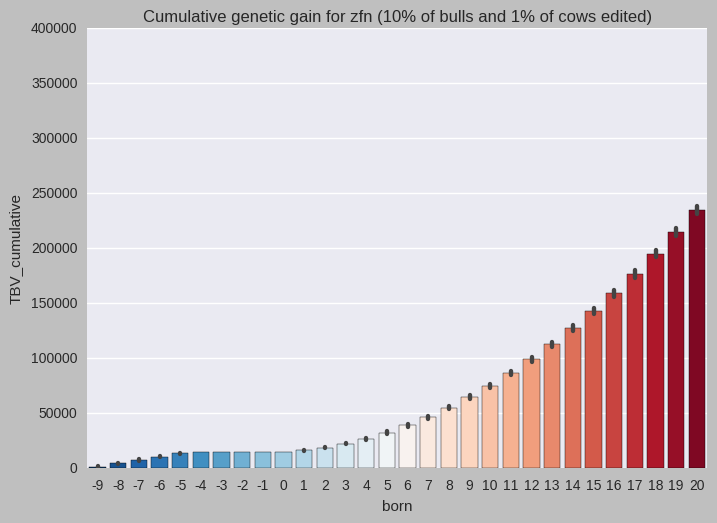

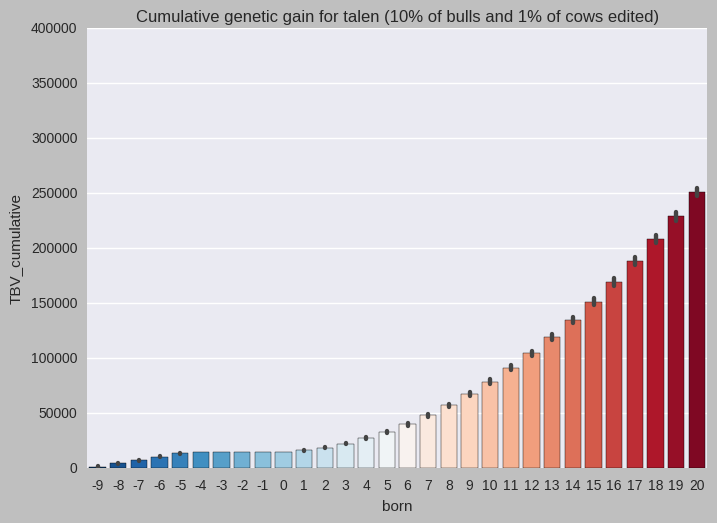

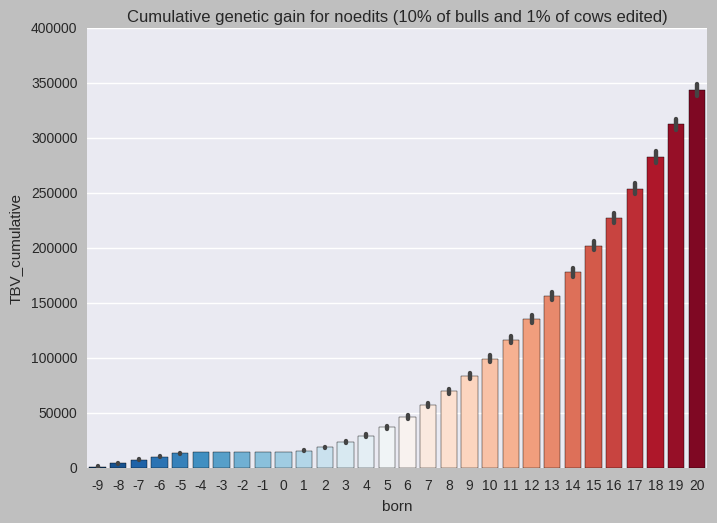

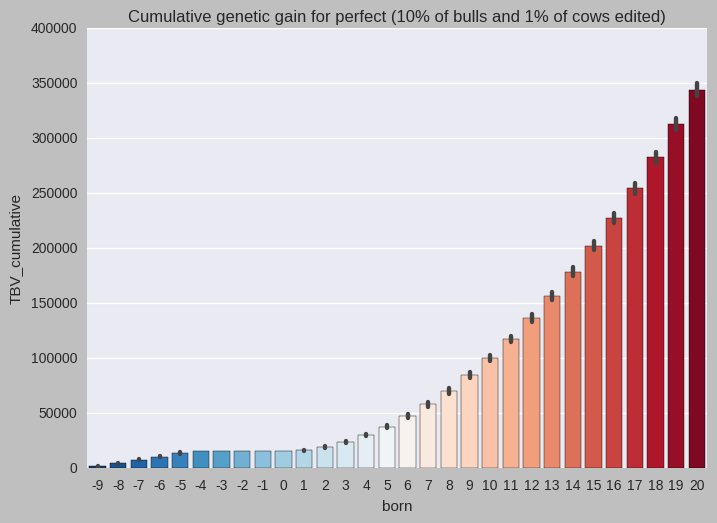

In [ ]:
for method in grouped['method'].value_counts().keys():
    sns.barplot(grouped[grouped['method'] == method]['born'],
                grouped[grouped['method'] == method]['TBV_cumulative'],
                palette="RdBu_r")
    plt.ylim(0,400000)
    plt.title(method)
    sns.plt.title('Cumulative genetic gain for %s (10%% of bulls and 1%% of cows edited)'%(method))
    sns_plot.get_figure().savefig('horned/10_01/genetic_gain_horned_%s_10_01.png'%(method), dpi=300)
    plt.show()